In [1]:
import ast
import pandas as pd
from datasets import load_dataset
from matplotlib import pyplot as plt

# Loading Dataset
datasets = load_dataset("lukebarousse/data_jobs")
df = datasets['train'].to_pandas()

# Cleaning Datasets
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) #str to date
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) #str to list to use explode

# Updating Datasets
df['job_month_number'] = df['job_posted_date'].dt.month # create month number column

Dataset

In [2]:
job_no_degree = df['job_no_degree_mention'].value_counts()
job_health_insurance = df['job_health_insurance'].value_counts()
work_from_home = df['job_work_from_home'].value_counts()

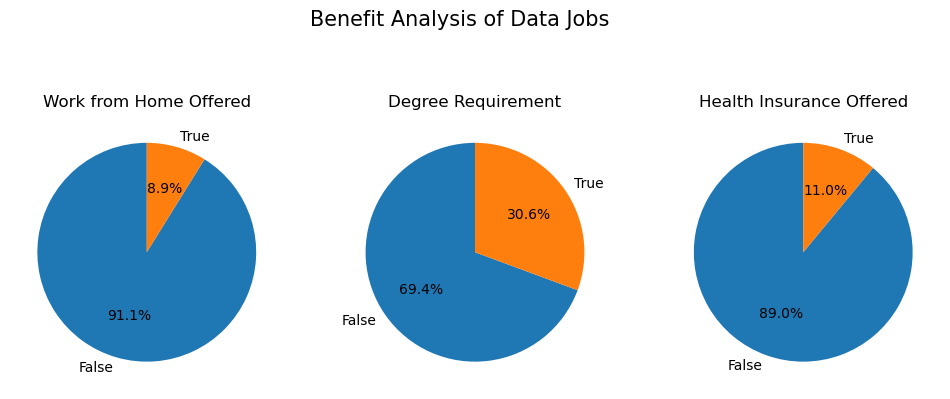

In [ ]:
dict_column = { # first for column name to import the data from it 
                # second for the title of each chart
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

# Set up the matplotlib figure
fig, ax = plt.subplots(1, 3) # 1 row and 3 columns
fig.set_size_inches((12, 5)) # to edit hight and width and make it pretty

# i index , column and title should be tuple()  cuz we have dict items
# label to pop up the label mae sure the correct varibles before switch them to not provide wrong data
# enumerate is like a function who tell the loop to take those varible from  this dict_column.items() that have :
#                                                 i => 0,1,2 
#                                                 column => (job_work_from_home,job_no_degree_mention,,,)
#                                                 title => (Work from Home Offered,Degree Requirement)     
# ax[i] => 0,1,2 for the first,second,third graph                
#                                     
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=15)
plt.show()